In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *
import datetime
zxynb = 1
%matplotlib inline

In [2]:
def rotateImage(img, degree, pt1, pt2, pt3, pt4): 
  print(pt1,pt2,pt3,pt4)
  height, width = img.shape[:2]
  heightNew = int(width * fabs(sin(radians(degree))) +
                  height * fabs(cos(radians(degree))))
  widthNew = int(height * fabs(sin(radians(degree))) +
                 width * fabs(cos(radians(degree))))
  matRotation = cv2.getRotationMatrix2D((width//2, height//2), degree, 1)
#   print(matRotation)
  matRotation[0, 2] += (widthNew - width) / 2
  matRotation[1, 2] += (heightNew - height) / 2
  print(matRotation)
  imgRotation = cv2.warpAffine(
      img, matRotation, (widthNew, heightNew), borderValue=(255, 255, 255))
  pt1 = list(pt1)
  pt3 = list(pt3)
  [[pt1[0]], [pt1[1]]] = np.dot(
      matRotation, np.array([[pt1[0]], [pt1[1]], [1]]))
  [[pt3[0]], [pt3[1]]] = np.dot(
      matRotation, np.array([[pt3[0]], [pt3[1]], [1]]))
  print(pt1,pt3,pt2,pt4)
  xmin = np.max([np.min([pt1[1],pt3[1]]),0])
  xmax = np.min([np.max([pt1[1],pt3[1]]),imgRotation.shape[0]])
  ymin = np.max([np.min([pt1[0],pt3[0]]),0])
  ymax = np.min([np.max([pt1[0],pt3[0]]),imgRotation.shape[1]])
  print(imgRotation.shape)
  print(xmin,xmax,ymin,ymax)
  imgOut = imgRotation[int(xmin):int(xmax), int(ymin):int(ymax)]

  imgOut = cv2.resize(imgOut, (500, 500))
  return imgOut;


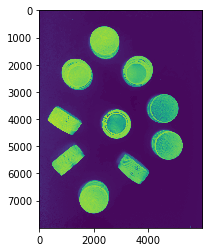

In [3]:
origin = cv2.imread("./dones/IMG_20191218_155504.jpg")
hsv = cv2.cvtColor(origin,cv2.COLOR_BGR2HSV)

# lower_blue = np.array([10,50,50])
# upper_blue = np.array([180,255,255])
# mask = cv2.inRange(hsv,lower_blue,upper_blue)
# img = cv2.resize(mask,(300,300))
h,s,v = cv2.split(hsv)
plt.imshow(s)

In [4]:
# gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray)
gray = s

In [5]:
sblur = cv2.blur(s,(15,15))
# plt.imshow(sblur)

In [6]:
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
# plt.imshow(gradient)

In [7]:
blurred = cv2.medianBlur(gradient, 9)
# plt.imshow(blurred)

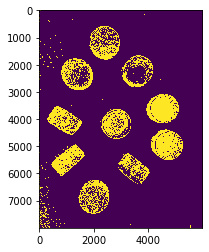

In [14]:
(_, thresh) = cv2.threshold(blurred, 35, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

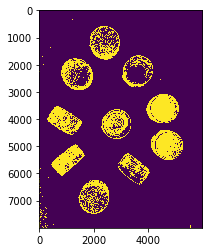

In [15]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
cl = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(cl)

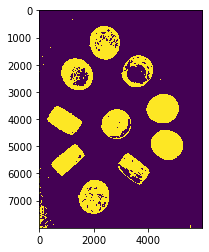

In [16]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35, 35))
closed = cv2.morphologyEx(cl, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

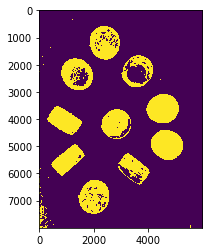

In [17]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations=4)
closed = cv2.dilate(closed, None, iterations=4)
plt.imshow(closed)

------------------
[2172 7691] [1224 7085] [1896 6034] [2843 6640]
[[-5.38599645e-01  8.42561821e-01  3.23155165e+03]
 [-8.42561821e-01 -5.38599645e-01  9.36408404e+03]]
[8541.856187649184, 3391.6698977560027] [7294.38475221403, 4516.676572302138] [1224 7085] [2843 6640]
(9364, 9972, 3)
3391.6698977560027 4516.676572302138 7294.38475221403 8541.856187649184
------------------
[3674 6485] [2753 5750] [3210 5178] [4131 5913]
[[-6.23763150e-01  7.81613416e-01  3.74233578e+03]
 [-7.81613416e-01 -6.23763150e-01  9.67939285e+03]]
[6519.392976827463, 2762.641129714577] [5787.250343094647, 3940.568191917826] [2753 5750] [4131 5913]
(9679, 9995, 3)
2762.641129714577 3940.568191917826 5787.250343094647 6519.392976827463
------------------
[ 811 6134] [ 390 5635] [1328 4843] [1749 5341]
[[-7.64315074e-01  6.44842979e-01  4.58557331e+03]
 [-6.44842979e-01 -7.64315074e-01  9.98328923e+03]]
[7921.180614187021, 4772.012911390999] [6693.537435351565, 5425.3598525017505] [ 390 5635] [1749 5341]
(9983, 

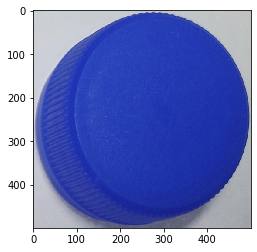

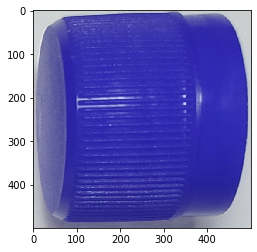

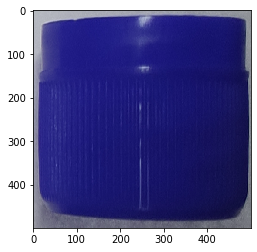

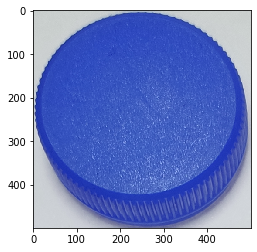

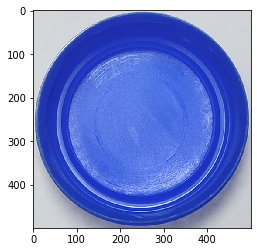

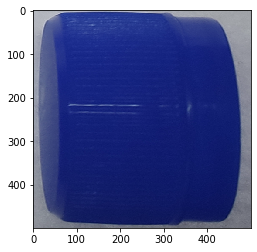

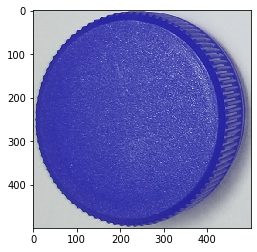

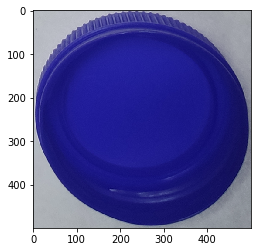

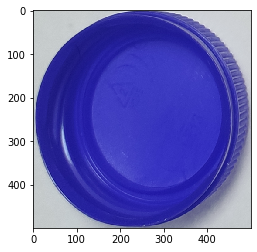

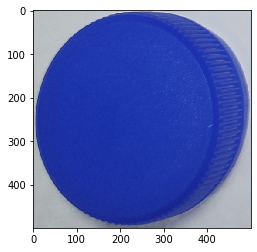

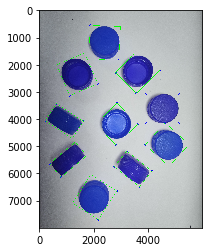

In [19]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
ct = 0
ls = []
res = np.copy(origin)
for c in cnts:
    if len(c) <= 400:
        continue
#     print(c)
    ct = ct + 1
    ls.append(len(c))
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    print("------------------")
    #print(-degrees(atan2(box[1][1]-box[0][1],box[1][0]-box[0][0])))
    imgOut = rotateImage(origin, -degrees(atan2(box[1][0]-box[0][0],box[1][1]-box[0][1])), box[0], box[1], box[2], box[3])
    
    now = datetime.datetime.now()
    global zxynb
    filename = str(now.strftime("%d-%H-%M-%S"))
    num_of_pages = str(zxynb)
    filename = './'+filename + '_'+ num_of_pages +'.jpg'
    cv2.imwrite(filename, imgOut)
    zxynb = zxynb+1
    plt.imshow(imgOut)
    plt.figure()
#   cv2.imshow("imgOut", imgOut)  # 裁减得到的旋转矩形框
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()
#     label = input("input:")  
#     dataframe = pd.DataFrame({'filename':[filename],'label':[label]})
#     dataframe.to_csv('label.csv', mode='a', index=False, header=False)   
    
    
    point_color = (0, 0, 255)
    for i in box:
        res = cv2.circle(res,(i[0],i[1]),30,point_color,8)
    # draw a bounding box arounded the detected barcode and display the image
    res = cv2.drawContours(res, [box], -1, (0, 255, 0), 10)
plt.imshow(res)
print(ct)
print(ls)

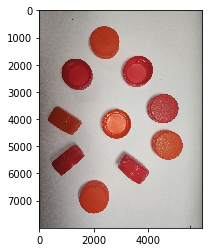

In [13]:
plt.imshow(cv2.cvtColor(origin,cv2.COLOR_BGR2RGB))